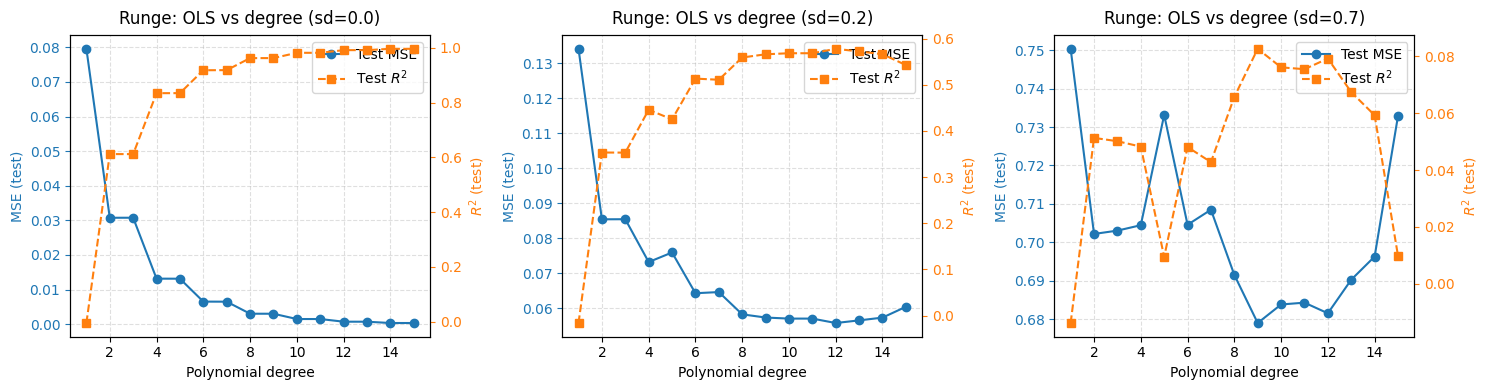

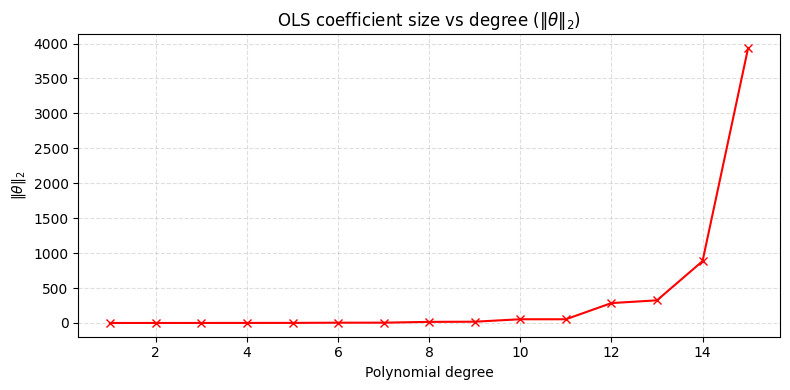

In [12]:
# --- Part (a): OLS only ---
import matplotlib.pyplot as plt
import numpy as np
import sys, pathlib

# Project-1 folder (parent of this Notebooks/ folder)
proj_dir = pathlib.Path.cwd().parent
if str(proj_dir) not in sys.path:
    sys.path.insert(0, str(proj_dir))

# Figures folder
fig_dir = proj_dir / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

from Code.data import make_data, build_features, split_and_scale
from Code.models import sweep_degree
from Code.plots import plot_mse_r2_vs_degree, plot_theta_norms

# data
noise_sds = [0.0,0.2, 0.7]
x, y = make_data(n=300, noise_sd=0.3, seed=42)
deg_max = 15
X_full = build_features(x, degree=deg_max, include_bias=False)

fig, axes = plt.subplots(1, len(noise_sds), figsize=(5*len(noise_sds), 4), sharex=True)
for ax, sd in zip(axes, noise_sds):
    x, y = make_data(n=300, noise_sd=sd, seed=42)
    X_full = build_features(x, degree=deg_max, include_bias=False)
    degrees, mse_deg, r2_deg, _ = sweep_degree(X_full, y, split_func=split_and_scale, deg_max=deg_max)

    plot_mse_r2_vs_degree(
        degrees, mse_deg, r2_deg,
        title=f"Runge: OLS vs degree (sd={sd})",
        ax=ax,            # <- draw on this subplot
        show=False,       # <- don't call plt.show() from inside
        savepath=None     # <- we'll save the whole figure once
    )

fig.tight_layout()
fig.savefig(fig_dir / "runge_ols_mse_r2_subplots.png", dpi=300, bbox_inches="tight")


# OLS vs degree
degrees, mse_deg, r2_deg, norms_deg = sweep_degree(X_full, y, split_func=split_and_scale, deg_max=deg_max)

# plots for (a)
# plot_mse_r2_vs_degree(degrees, mse_deg, r2_deg, title="Runge: OLS vs degree", savepath=fig_dir / "runge_ols_mse_r2_vs_degree.png")

plot_theta_norms(
    degrees, norms_deg,
    xlabel="Polynomial degree",
    title = r"OLS coefficient size vs degree ($\|\theta\|_2$)", 
    savepath=fig_dir / "runge_ols_theta_norms_vs_degree.png"
)
